# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [41]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [42]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

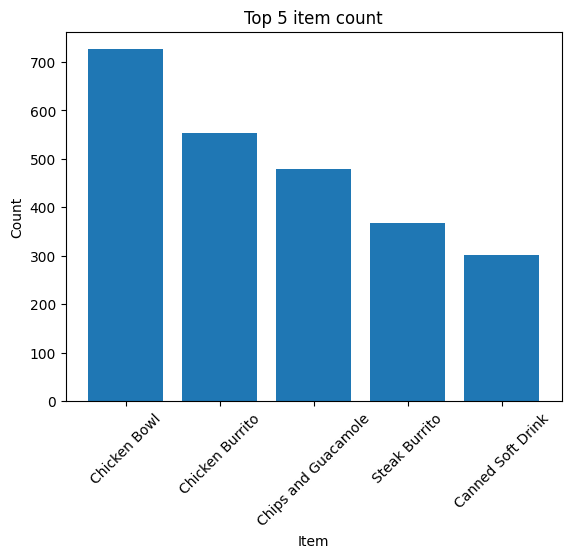

In [43]:
top5_items = dict(Counter(chipo['item_name']).most_common(5))

plt.bar(x = top5_items.keys(), height=top5_items.values())
plt.xlabel('Item')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Top 5 item count')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [44]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: x[1:]).astype(float)

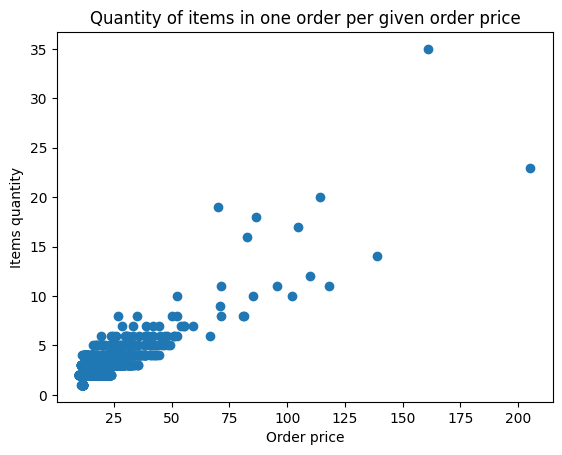

In [45]:
plt.scatter(x = chipo.groupby('order_id').sum()['item_price'], y=chipo.groupby('order_id').sum()['quantity'])
plt.xlabel('Order price')
plt.ylabel('Items quantity')
plt.title('Quantity of items in one order per given order price')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

What are the top 5 most expensive items on the Chipotle menu based on their price?

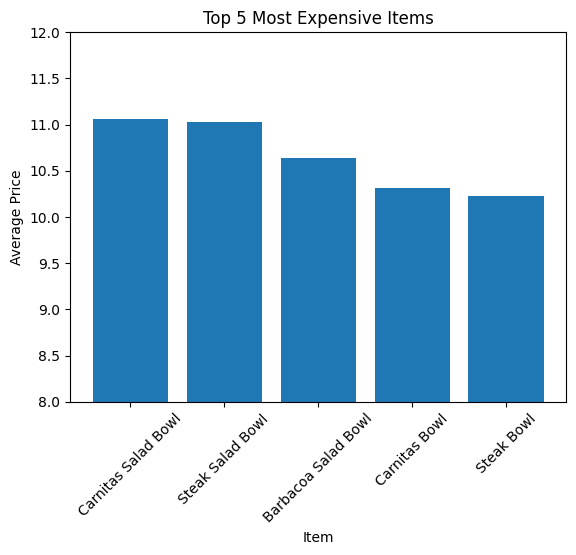

In [49]:
chipo['single_item_price'] = chipo['item_price'] / chipo['quantity']

top5_expensive_items = chipo.groupby('item_name')['single_item_price'].mean().sort_values(ascending=False)[:5]

plt.bar(top5_expensive_items.index, top5_expensive_items.values)
plt.xlabel('Item')
plt.ylabel('Average Price')
plt.title('Top 5 Most Expensive Items')
plt.ylim(8,12)
plt.xticks(rotation=45)
plt.show()